In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from portfolio_optimizer.weight_allocators.HierarchicalRiskParity import HierarchicalRiskParity
from scipy.cluster.hierarchy import dendrogram

In [23]:
final_df = pd.read_csv("dataset/final_data/weekly_gold_data.csv")
final_df["timestamp"] = pd.to_datetime(final_df["timestamp"])

x = final_df.pivot(index='timestamp', columns='symbol', values='performance_last_month')
x = x[["NVDA", "AMD", "PFE"]]
x = x[x.index > pd.to_datetime("2021-03-25")]
#x = x.iloc[1:, :]
x = x.dropna(axis=0)
cols = x.columns

In [24]:
hrp = HierarchicalRiskParity()
final_result = hrp.fit(x)

In [25]:
for key, value in final_result.items():
    print(f"{key} - {value * 100:.2f}% - {x[key].std():.3f}")

AMD - 12.44% - 0.071
NVDA - 12.67% - 0.070
PFE - 74.89% - 0.038


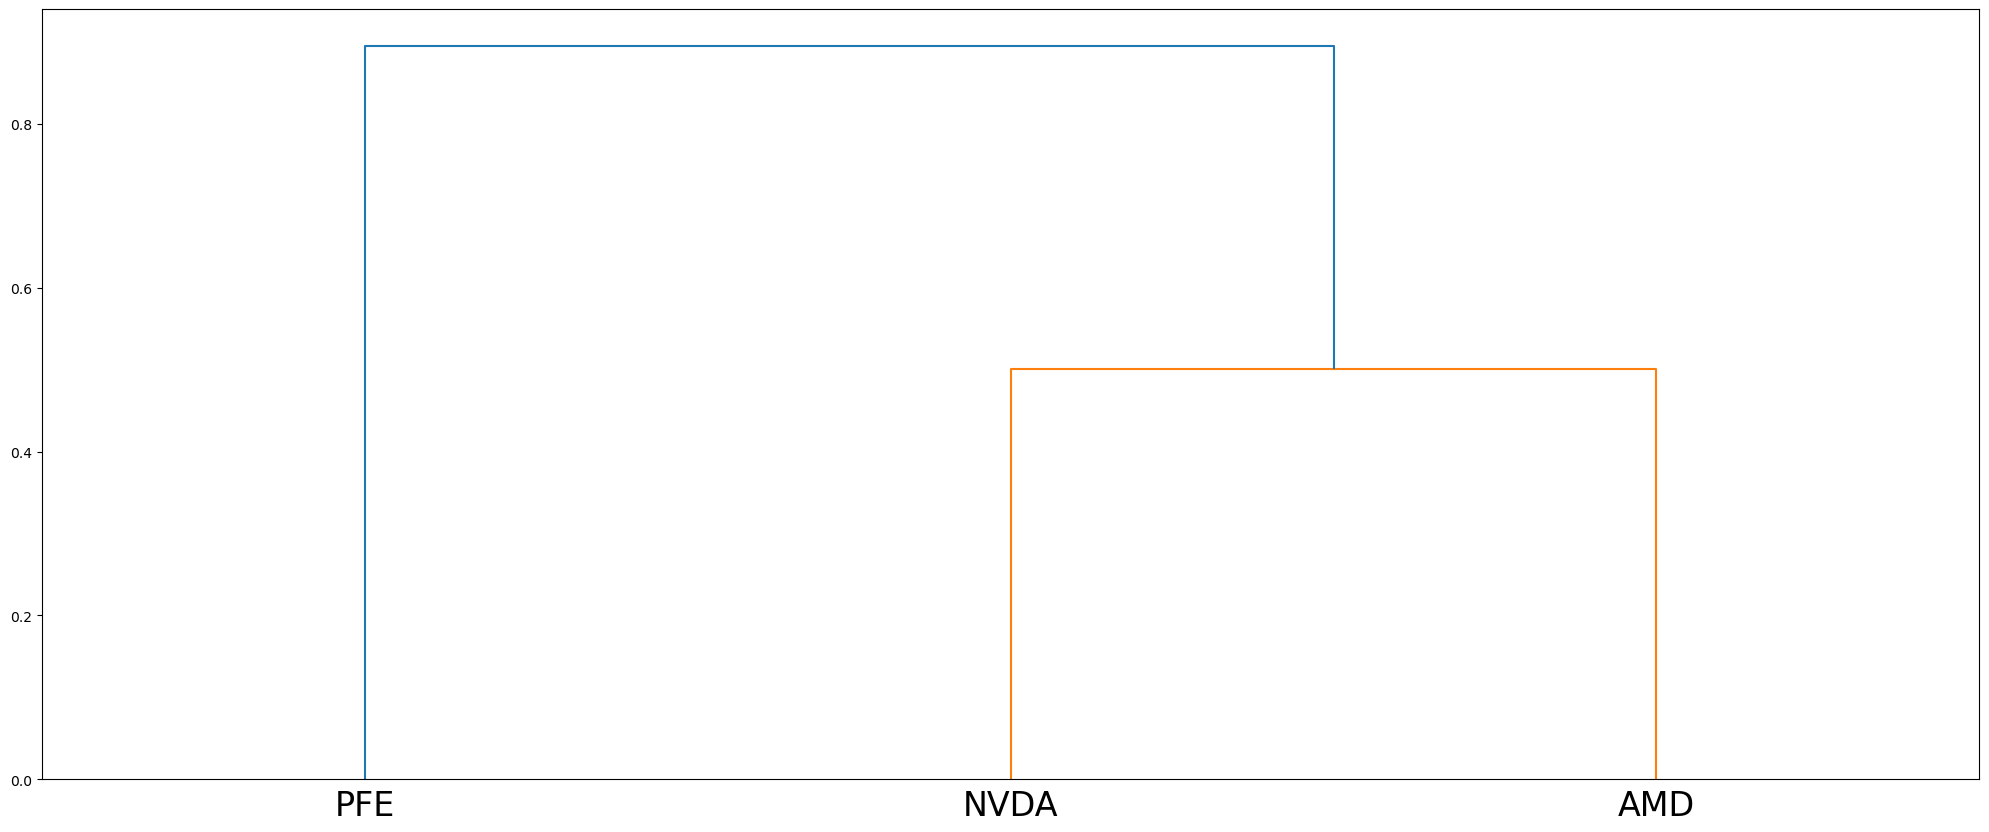

In [37]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(hrp.linkage_matrix, labels=x.columns, leaf_font_size=24)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

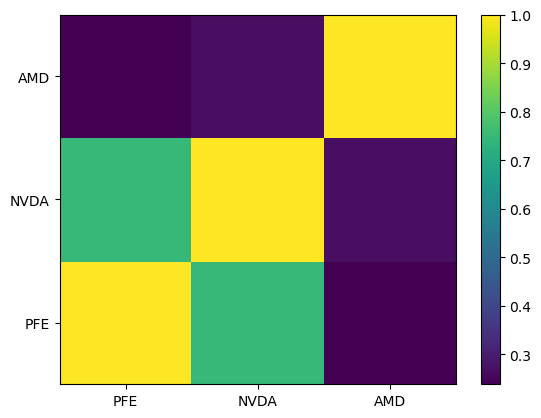

In [27]:
plt.pcolor(hrp.corr_matrix)
plt.colorbar()
plt.yticks(np.arange(.5,hrp.corr_matrix.shape[0]+.5),x.columns[hrp.sorted_elems])
plt.xticks(np.arange(.5,hrp.corr_matrix.shape[0]+.5),x.columns[hrp.sorted_elems])
plt.show

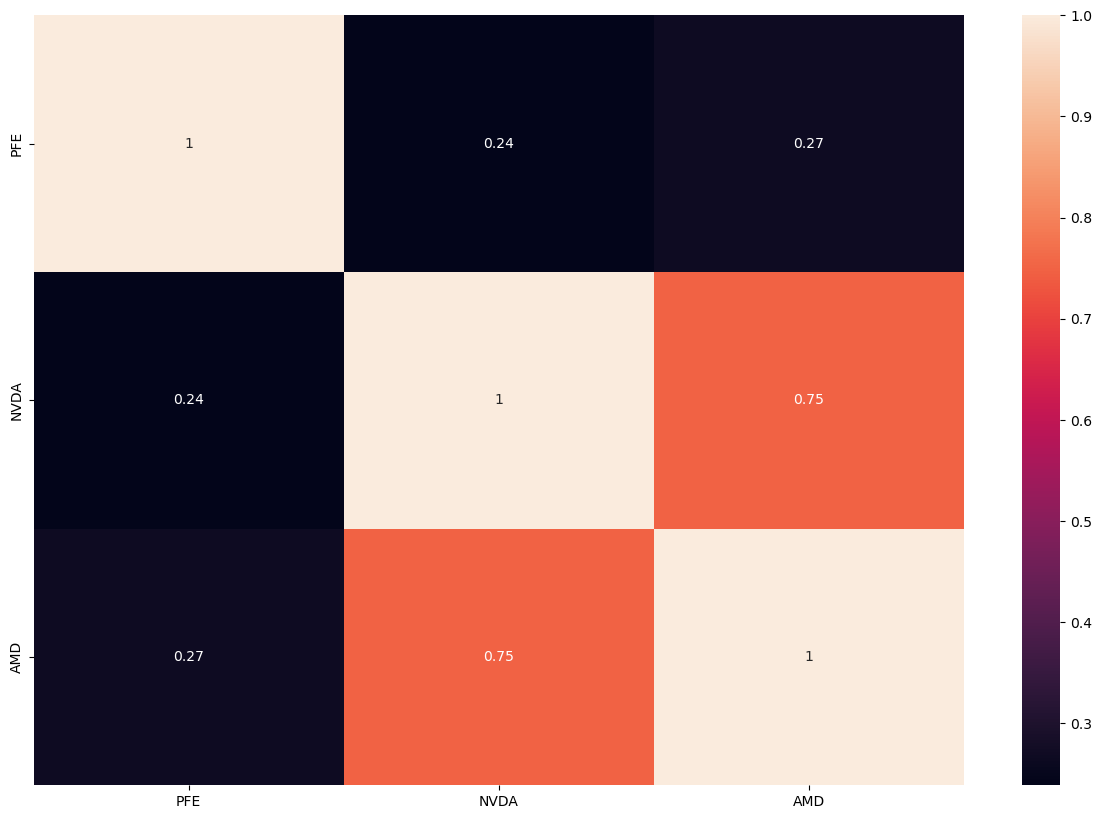

In [28]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(hrp.corr_matrix[:, hrp.sorted_elems][hrp.sorted_elems, :], annot=True)
plt.yticks(np.arange(.5,hrp.corr_matrix.shape[0]+.5),x.columns[hrp.sorted_elems])
plt.xticks(np.arange(.5,hrp.corr_matrix.shape[0]+.5),x.columns[hrp.sorted_elems])
plt.show()

In [29]:
for i in range(hrp.corr_matrix.shape[0]):
    for j in range(hrp.corr_matrix.shape[1]):
        if j == hrp.corr_matrix.shape[1] -1:
            print(f"{hrp.corr_matrix[i,j]:.4f} \\\\", end="")
        else:
            print(f"{hrp.corr_matrix[i,j]:.4f} &", end="")
    print()

1.0000 &0.7490 &0.2387 \\
0.7490 &1.0000 &0.2676 \\
0.2387 &0.2676 &1.0000 \\


In [30]:
for i in range(hrp.corr_dist_matrix.shape[0]):
    for j in range(hrp.corr_dist_matrix.shape[1]):
        if j == hrp.corr_dist_matrix.shape[1] -1:
            print(f"{hrp.corr_dist_matrix[i,j]:.4f} \\\\", end="")
        else:
            print(f"{hrp.corr_dist_matrix[i,j]:.4f} &", end="")
    print()

0.0000 &0.3542 &0.6170 \\
0.3542 &0.0000 &0.6051 \\
0.6170 &0.6051 &0.0000 \\


In [31]:
hrp.linkage_matrix

array([[0.        , 1.        , 0.50110524, 2.        ],
       [2.        , 3.        , 0.89520551, 3.        ]])

In [32]:
littlex = np.linalg.norm(hrp.corr_dist_matrix[:, None, :] - hrp.corr_dist_matrix[None, :, :], axis=-1)

In [33]:
for i in range(littlex.shape[0]):
    for j in range(littlex.shape[1]):
        if j == littlex.shape[1] -1:
            print(f"{littlex[i,j]:.2f} \\\\", end="")
        else:
            print(f"{littlex[i,j]:.2f} &", end="")
    print()

0.00 &0.50 &0.91 \\
0.50 &0.00 &0.90 \\
0.91 &0.90 &0.00 \\
